In [5]:
import pickle
import argparse
from utils import get_data, plot_prob_result,seed_everything
import copy
import pandas as pd
# Load the server object
import torch
from torch.nn import MSELoss
import numpy as np
from torch.nn import L1Loss
scale=24

with open('../result/'+str(scale)+'/server.pkl', 'rb') as f:
    server = pickle.load(f)

# Load the clients object
with open('../result/'+str(scale)+'/clients.pkl', 'rb') as f:
    clients = pickle.load(f)

In [2]:
fed_local_proposed_losses=[]
fed_local_proposed_preds=[]
fed_local_proposed_models=[]
for i in range(7):
    fed_local_proposed_pred,fed_local_proposed_loss,fed_local_proposed_model=clients[i].fed_local_evaluation()
    fed_local_proposed_losses.append(fed_local_proposed_loss[server.index_set[i]])
    fed_local_proposed_preds.append(fed_local_proposed_pred[server.index_set[i]])
    fed_local_proposed_models.append(fed_local_proposed_model[server.index_set[i]])
print(fed_local_proposed_losses)

[0.07223644668925298, 0.08466056167875251, 0.09076731196566395, 0.08110292202295506, 0.08223103012328278, 0.0757141739053473, 0.09013798964299159]


In [7]:
fed_local_proposed_preds[0].shape

torch.Size([9289, 9])

In [35]:
local_fine_tune_ewc_losses=[]
local_fine_tune_ewc_preds=[]
local_fine_tune_ewc_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_ewc_pred,local_fine_tune_ewc_loss,local_fine_tune_ewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=True,importance=0.02,fine_tune_epochs=20)
    local_fine_tune_ewc_losses.append(local_fine_tune_ewc_loss)
    local_fine_tune_ewc_preds.append(local_fine_tune_ewc_pred)
    local_fine_tune_ewc_models.append(local_fine_tune_ewc_model)
print(local_fine_tune_ewc_losses)

1e-05 0
self.importance 0.02
Epoch [1/20] Train Loss: 0.0567 Val Loss: 0.0578
Epoch [2/20] Train Loss: 0.0561 Val Loss: 0.0572
Epoch [3/20] Train Loss: 0.0557 Val Loss: 0.0569
Epoch [4/20] Train Loss: 0.0555 Val Loss: 0.0567
Epoch [5/20] Train Loss: 0.0553 Val Loss: 0.0567
Epoch [6/20] Train Loss: 0.0553 Val Loss: 0.0565
Epoch [7/20] Train Loss: 0.0552 Val Loss: 0.0564
Epoch [8/20] Train Loss: 0.0552 Val Loss: 0.0564
Epoch [9/20] Train Loss: 0.0551 Val Loss: 0.0563
Epoch [10/20] Train Loss: 0.0551 Val Loss: 0.0564
Epoch [11/20] Train Loss: 0.0550 Val Loss: 0.0564
Epoch [12/20] Train Loss: 0.0550 Val Loss: 0.0562
Epoch [13/20] Train Loss: 0.0550 Val Loss: 0.0563
Epoch [14/20] Train Loss: 0.0549 Val Loss: 0.0562
Epoch [15/20] Train Loss: 0.0550 Val Loss: 0.0561
Epoch [16/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [17/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [18/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [19/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [20/20] Train Loss: 0.05

In [141]:
local_fine_tune_noewc_losses=[]
local_fine_tune_noewc_preds=[]
local_fine_tune_noewc_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_noewc_pred,local_fine_tune_noewc_loss,local_fine_tune_noewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=False,importance=0.02,fine_tune_epochs=20)
    local_fine_tune_noewc_losses.append(local_fine_tune_noewc_loss)
    local_fine_tune_noewc_preds.append(local_fine_tune_noewc_pred)
    local_fine_tune_noewc_models.append(local_fine_tune_noewc_model)
print(local_fine_tune_noewc_losses)

1e-05 0
Epoch [1/20] Train Loss: 0.0567 Val Loss: 0.0578
Epoch [2/20] Train Loss: 0.0559 Val Loss: 0.0571
Epoch [3/20] Train Loss: 0.0554 Val Loss: 0.0568
Epoch [4/20] Train Loss: 0.0551 Val Loss: 0.0567
Epoch [5/20] Train Loss: 0.0549 Val Loss: 0.0563
Epoch [6/20] Train Loss: 0.0547 Val Loss: 0.0562
Epoch [7/20] Train Loss: 0.0545 Val Loss: 0.0563
Epoch [8/20] Train Loss: 0.0544 Val Loss: 0.0561
Epoch [9/20] Train Loss: 0.0542 Val Loss: 0.0560
Epoch [10/20] Train Loss: 0.0542 Val Loss: 0.0559
Epoch [11/20] Train Loss: 0.0540 Val Loss: 0.0558
Epoch [12/20] Train Loss: 0.0539 Val Loss: 0.0559
Epoch [13/20] Train Loss: 0.0538 Val Loss: 0.0557
Epoch [14/20] Train Loss: 0.0538 Val Loss: 0.0557
Epoch [15/20] Train Loss: 0.0537 Val Loss: 0.0555
Epoch [16/20] Train Loss: 0.0536 Val Loss: 0.0555
Epoch [17/20] Train Loss: 0.0535 Val Loss: 0.0554
Epoch [18/20] Train Loss: 0.0534 Val Loss: 0.0553
Epoch [19/20] Train Loss: 0.0533 Val Loss: 0.0553
Epoch [20/20] Train Loss: 0.0532 Val Loss: 0.0552
1

In [6]:
import pickle

# Load the server object
with open('../result/'+str(scale)+'/server_benchmark.pkl', 'rb') as f:
    server_benchmark = pickle.load(f)

# Load the clients object
with open('../result/'+str(scale)+'/clients_benchmark.pkl', 'rb') as f:
    clients_benchmark = pickle.load(f)

In [143]:
fed_local_losses=[]
fed_local_preds=[]
fed_local_models=[]
for i in range(7):
    fed_local_pred,fed_local_loss,fed_local_model=clients_benchmark[i].fed_local_evaluation()
    fed_local_losses.append(fed_local_loss)
    fed_local_preds.append(fed_local_pred)
    fed_local_models.append(fed_local_model)
print(fed_local_losses)

[0.07414915443283238, 0.08909740545212814, 0.09162906327680366, 0.08211914724223826, 0.08759168286693014, 0.07979674568425303, 0.08564044110323876]


In [144]:
central_losses=[]
central_preds=[]
central_models=[]
for i in range(7):
    central_pred,central_loss,central_model=server_benchmark.central_evaluation(dataset=i)
    central_losses.append(central_loss)
    central_preds.append(central_pred)
    central_models.append(central_model)
print(central_losses)

[0.07551540075865103, 0.09200877592937179, 0.09616044051434895, 0.08540064513632288, 0.08885041996836662, 0.0840047773050323, 0.08917854520913264]


In [7]:
local_losses=[]
local_preds=[]
local_models=[]
for i in range(7):
    local_pred,local_loss,local_model=clients_benchmark[i].local_evaluation()
    local_losses.append(local_loss)
    local_preds.append(local_pred)
    local_models.append(local_model)
print(local_losses)

[0.08041695084371796, 0.08744908469946008, 0.09325712222656975, 0.08830002137804277, 0.07983406686721599, 0.08646285887297293, 0.09836889615869276]


In [146]:
local_fine_tune_ewc_benchmark_losses=[]
local_fine_tune_ewc_benchmark_preds=[]
local_fine_tune_ewc_benchmark_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_ewc_benchmark_pred,local_fine_tune_ewc_benchmark_loss,local_fine_tune_ewc_benchmark_model=clients_benchmark[i].local_fine_tune(ewc_flag=True,importance=0.02,fine_tune_epochs=20)
    local_fine_tune_ewc_benchmark_losses.append(local_fine_tune_ewc_benchmark_loss)
    local_fine_tune_ewc_benchmark_preds.append(local_fine_tune_ewc_benchmark_pred)
    local_fine_tune_ewc_benchmark_models.append(local_fine_tune_ewc_benchmark_model)
print(local_fine_tune_ewc_benchmark_losses)

1e-05 0
self.importance 0.02
Epoch [1/20] Train Loss: 0.0640 Val Loss: 0.0645
Epoch [2/20] Train Loss: 0.0637 Val Loss: 0.0642
Epoch [3/20] Train Loss: 0.0634 Val Loss: 0.0640
Epoch [4/20] Train Loss: 0.0633 Val Loss: 0.0639
Epoch [5/20] Train Loss: 0.0632 Val Loss: 0.0638
Epoch [6/20] Train Loss: 0.0631 Val Loss: 0.0637
Epoch [7/20] Train Loss: 0.0631 Val Loss: 0.0636
Epoch [8/20] Train Loss: 0.0630 Val Loss: 0.0636
Epoch [9/20] Train Loss: 0.0630 Val Loss: 0.0636
Epoch [10/20] Train Loss: 0.0629 Val Loss: 0.0635
Epoch [11/20] Train Loss: 0.0629 Val Loss: 0.0635
Epoch [12/20] Train Loss: 0.0628 Val Loss: 0.0635
Epoch [13/20] Train Loss: 0.0628 Val Loss: 0.0635
Epoch [14/20] Train Loss: 0.0628 Val Loss: 0.0634
Epoch [15/20] Train Loss: 0.0628 Val Loss: 0.0634
Epoch [16/20] Train Loss: 0.0627 Val Loss: 0.0633
Epoch [17/20] Train Loss: 0.0627 Val Loss: 0.0632
Epoch [18/20] Train Loss: 0.0627 Val Loss: 0.0634
Epoch [19/20] Train Loss: 0.0627 Val Loss: 0.0633
Epoch [20/20] Train Loss: 0.06

In [147]:
local_fine_tune_benchmark_losses=[]
local_fine_tune_benchmark_preds=[]
local_fine_tune_benchmark_models=[]
seed_everything(1)
for i in range(7):
    local_fine_tune_benchmark_pred,local_fine_tune_benchmark_loss,local_fine_tune_benchmark_model=clients_benchmark[i].local_fine_tune()
    local_fine_tune_benchmark_losses.append(local_fine_tune_benchmark_loss)
    local_fine_tune_benchmark_preds.append(local_fine_tune_benchmark_pred)
    local_fine_tune_benchmark_models.append(local_fine_tune_benchmark_model)
print(local_fine_tune_benchmark_losses)

1e-05 0


Epoch [1/10] Train Loss: 0.0640 Val Loss: 0.0645
Epoch [2/10] Train Loss: 0.0636 Val Loss: 0.0642
Epoch [3/10] Train Loss: 0.0633 Val Loss: 0.0640
Epoch [4/10] Train Loss: 0.0631 Val Loss: 0.0641
Epoch [5/10] Train Loss: 0.0629 Val Loss: 0.0637
Epoch [6/10] Train Loss: 0.0628 Val Loss: 0.0636
Epoch [7/10] Train Loss: 0.0627 Val Loss: 0.0637
Epoch [8/10] Train Loss: 0.0625 Val Loss: 0.0635
Epoch [9/10] Train Loss: 0.0625 Val Loss: 0.0634
Epoch [10/10] Train Loss: 0.0624 Val Loss: 0.0633
1e-05 0
Epoch [1/10] Train Loss: 0.0760 Val Loss: 0.0758
Epoch [2/10] Train Loss: 0.0756 Val Loss: 0.0755
Epoch [3/10] Train Loss: 0.0753 Val Loss: 0.0752
Epoch [4/10] Train Loss: 0.0750 Val Loss: 0.0751
Epoch [5/10] Train Loss: 0.0748 Val Loss: 0.0750
Epoch [6/10] Train Loss: 0.0747 Val Loss: 0.0748
Epoch [7/10] Train Loss: 0.0745 Val Loss: 0.0747
Epoch [8/10] Train Loss: 0.0744 Val Loss: 0.0746
Epoch [9/10] Train Loss: 0.0743 Val Loss: 0.0747
Epoch [10/10] Train Loss: 0.0741 Val Loss: 0.0745
1e-05 0
Ep

In [148]:
print(local_losses)
print(central_losses)
print(fed_local_losses)
print(local_fine_tune_benchmark_losses)
print(local_fine_tune_ewc_benchmark_losses)
print(fed_local_proposed_losses)
print(local_fine_tune_noewc_losses)
print(local_fine_tune_ewc_losses)

print(np.mean(local_fine_tune_ewc_benchmark_losses))
print(np.mean(local_fine_tune_benchmark_losses))

[0.08041695084371796, 0.08744908469946008, 0.09325712222656975, 0.08830002137804277, 0.07983406686721599, 0.08646285887297293, 0.09836889615869276]
[0.07551540075865103, 0.09200877592937179, 0.09616044051434895, 0.08540064513632288, 0.08885041996836662, 0.0840047773050323, 0.08917854520913264]
[0.07414915443283238, 0.08909740545212814, 0.09162906327680366, 0.08211914724223826, 0.08759168286693014, 0.07979674568425303, 0.08564044110323876]
[0.07450775604388893, 0.08742033441436209, 0.08983032466614083, 0.08161162863141053, 0.08352795929635225, 0.08052069096736712, 0.0859235859386725]
[0.07419511872305445, 0.08763980251826244, 0.08961744333477054, 0.08164629509851132, 0.08368171181223572, 0.08050171976067023, 0.0861646009047758]
[0.07223644668925298, 0.08466056167875251, 0.09076731196566395, 0.08110292202295506, 0.08223103012328278, 0.0757141739053473, 0.09013798964299159]
[0.07040135934948921, 0.0854005254805088, 0.08476884714136385, 0.08001411175482893, 0.07970286040783744, 0.076216941

In [10]:
parser_train = argparse.ArgumentParser(description='FL')
parser_train.add_argument('--root_path', type=str, default='../Data/GFC12/')
parser_train.add_argument('--dataset_paths', type=list, default=["wf1", "wf2", "wf3", "wf4", "wf5", "wf6", "wf7"])
parser_train.add_argument('--number_clients', type=int, default=7)
parser_train.add_argument('--seq_len', type=int, default=24*4)
parser_train.add_argument('--pred_len', type=int, default=scale)
parser_train.add_argument('--label_len', type=int, default=0)
parser_train.add_argument('--train_length', type=int, default=16800)
parser_train.add_argument('--target', type=str, default='target')
parser_train.add_argument('--scale', type=bool, default=True)
parser_train.add_argument('--inverse', type=bool, default=True)
parser_train.add_argument('--k', type=int, default=2)

parser_train.add_argument('--lr', type=float, default=1e-4)
parser_train.add_argument('--fine_tune_lr', type=float, default=1e-5)
parser_train.add_argument('--global_epochs', type=int, default=200)
parser_train.add_argument('--local_epochs', type=int, default=1)
parser_train.add_argument('--fine_tune_epochs', type=int, default=20)
parser_train.add_argument('--patience', type=int, default=3)
parser_train.add_argument('--fed_patience', type=int, default=3)
parser_train.add_argument('--hidden_layers', type=list, default=[64,64,64])
parser_train.add_argument('--input_size', type=int, default=293)
parser_train.add_argument('--output_size', type=int, default=9)


parser_train.add_argument('--warm_up_epochs', type=int, default=15)
parser_train.add_argument('--selection_epochs', type=int, default=4)
parser_train.add_argument('--importance', type=float, default=0)
parser_train.add_argument('--batch_size', type=int, default=64)
parser_train.add_argument('--device', type=str, default='cuda:1' if torch.cuda.is_available() else 'cpu')
parser_train.add_argument('--forecasting_mode', type=str, default='prob')
parser_train.add_argument('--model_type', type=str, default='NN')
parser_train.add_argument('--model_save_path', type=str, default='../Model2/', help='location of model checkpoints')
parser_train.add_argument('--quantiles', type=list, default=[0.1,0.2,0.3,0.4, 0.5,0.6,0.7,0.8, 0.9])
parser_train.add_argument('--decay', type=float, default=0.75)
args_train = parser_train.parse_args(args=[])

In [153]:
import torch
from torch.nn import MSELoss
import numpy as np
class RMSELoss:
    def __init__(self, reduction: str = 'mean'):
        self.reduction = reduction
        self.mse_loss = MSELoss(reduction=reduction)

    def __call__(self, output: torch.Tensor, target: torch.Tensor):
        output=output.cpu()[:,4]#.reshape(-1,1)
        mse = self.mse_loss(output, target)
        rmse = torch.sqrt(mse)

        if self.reduction == 'sum':
            rmse = rmse.sum()
        if self.reduction == 'mean':
            rmse = rmse.mean()

        return rmse
    

import torch
from torch.nn import L1Loss

class MAELoss:
    def __init__(self, reduction: str = 'mean'):
        self.reduction = reduction
        self.mae_loss = L1Loss(reduction=reduction)

    def __call__(self, output: torch.Tensor, target: torch.Tensor):
        output = output.cpu()[:, 4]
        mae = self.mae_loss(output, target)

        if self.reduction == 'sum':
            mae = mae.sum()
        if self.reduction == 'mean':
            mae = mae.mean()

        return mae

In [11]:
actual_y_lst=[]

for i in range(7):
    args_temp=copy.deepcopy(args_train)
    args_temp.dataset_paths='wf'+str(i+1)
    test_data, test_loader = get_data(args_temp,flag='test')
    actual_y=[]
    for idx, (seq_x, seq_x_concat, seq_y) in enumerate(test_loader):
        actual_y.append(seq_y)
    actual_y = torch.cat([torch.flatten(t) for t in actual_y])
    actual_y_lst.append(actual_y)

In [155]:
local_rmse = []
central_rmse = []
fed_local_rmse = []
local_fine_tune_rmse = []
fed_local_proposed_rmse = []
local_fine_tune_noewc_rmse = []
local_fine_tune_ewc_rmse = []
local_fine_tune_benchmark_ewc_rmse = []
rmse_loss = RMSELoss('mean')

for i in range(7):
    fed_local_rmse.append(rmse_loss(fed_local_preds[i], actual_y_lst[i]))
    local_rmse.append(rmse_loss(local_preds[i], actual_y_lst[i]))
    central_rmse.append(rmse_loss(central_preds[i], actual_y_lst[i]))
    local_fine_tune_rmse.append(rmse_loss(local_fine_tune_benchmark_preds[i], actual_y_lst[i]))
    local_fine_tune_benchmark_ewc_rmse.append(rmse_loss(local_fine_tune_ewc_benchmark_preds[i], actual_y_lst[i]))
    fed_local_proposed_rmse.append(rmse_loss(fed_local_proposed_preds[i], actual_y_lst[i]))
    local_fine_tune_noewc_rmse.append(rmse_loss(local_fine_tune_noewc_preds[i], actual_y_lst[i]))
    local_fine_tune_ewc_rmse.append(rmse_loss(local_fine_tune_ewc_preds[i], actual_y_lst[i]))

df_RMSE = pd.DataFrame({
    'local_rmse': np.array(local_rmse),
    'central_rmse': np.array(central_rmse),
    'fed_local_rmse': np.array(fed_local_rmse),
    'local_fine_tune_rmse': np.array(local_fine_tune_rmse),
    'local_fine_tune_benchmark_ewc_rmse': np.array(local_fine_tune_benchmark_ewc_rmse),
    'fed_local_proposed_rmse': np.array(fed_local_proposed_rmse),
    'local_fine_tune_noewc_rmse': np.array(local_fine_tune_noewc_rmse),
    'local_fine_tune_ewc_rmse': np.array(local_fine_tune_ewc_rmse),
}).T
df_RMSE['mean_rmse'] = df_RMSE.mean(axis=1)
df_RMSE.to_csv('rmse.csv', index=False)

In [156]:
local_mae = []
central_mae = []
fed_local_mae = []
local_fine_tune_mae = []
fed_local_proposed_mae = []
local_fine_tune_noewc_mae = []
local_fine_tune_ewc_mae = []
local_fine_tune_benchmark_ewc_mae = []
mae_loss = MAELoss('mean')

for i in range(7):
    fed_local_mae.append(mae_loss(fed_local_preds[i], actual_y_lst[i]))
    local_mae.append(mae_loss(local_preds[i], actual_y_lst[i]))
    central_mae.append(mae_loss(central_preds[i], actual_y_lst[i]))
    local_fine_tune_mae.append(mae_loss(local_fine_tune_benchmark_preds[i], actual_y_lst[i]))
    local_fine_tune_benchmark_ewc_mae.append(mae_loss(local_fine_tune_ewc_benchmark_preds[i], actual_y_lst[i]))
    fed_local_proposed_mae.append(mae_loss(fed_local_proposed_preds[i], actual_y_lst[i]))
    local_fine_tune_noewc_mae.append(mae_loss(local_fine_tune_noewc_preds[i], actual_y_lst[i]))
    local_fine_tune_ewc_mae.append(mae_loss(local_fine_tune_ewc_preds[i], actual_y_lst[i]))

df_MAE = pd.DataFrame({
    'local_mae': np.array(local_mae),
    'central_mae': np.array(central_mae),
    'fed_local_mae': np.array(fed_local_mae),
    'local_fine_tune_mae': np.array(local_fine_tune_mae),
    'local_fine_tune_benchmark_ewc_mae': np.array(local_fine_tune_benchmark_ewc_mae),
    'fed_local_proposed_mae': np.array(fed_local_proposed_mae),
    'local_fine_tune_noewc_mae': np.array(local_fine_tune_noewc_mae),
    'local_fine_tune_ewc_mae': np.array(local_fine_tune_ewc_mae),
}).T
df_MAE['mean_mae'] = df_MAE.mean(axis=1)
df_MAE.to_csv('mae.csv', index=False)

In [157]:
df_MAE

,0,1,2,3,4,5,6,mean_mae
local_mae,0.201333,0.216065,0.246883,0.216563,0.202829,0.228982,0.237696,0.221479
central_mae,0.197328,0.236665,0.247627,0.224792,0.228676,0.219252,0.233236,0.226797
fed_local_mae,0.195073,0.237748,0.241869,0.218557,0.231280,0.211047,0.229074,0.223521
local_fine_tune_mae,0.195875,0.233397,0.239714,0.216377,0.218214,0.211978,0.229349,0.220701
local_fine_tune_benchmark_ewc_mae,0.194834,0.233815,0.238950,0.216268,0.218580,0.211907,0.229952,0.220615
fed_local_proposed_mae,0.187692,0.218105,0.236040,0.199154,0.213016,0.185841,0.221983,0.208833
local_fine_tune_noewc_mae,0.182016,0.222753,0.219961,0.193607,0.203983,0.182693,0.190163,0.199311
local_fine_tune_ewc_mae,0.181359,0.222004,0.221032,0.193545,0.204722,0.182188,0.190511,0.199337


In [158]:
df_RMSE

,0,1,2,3,4,5,6,mean_rmse
local_rmse,0.270317,0.286127,0.323108,0.298469,0.281637,0.299442,0.327683,0.298112
central_rmse,0.263610,0.315820,0.333288,0.296897,0.311156,0.297208,0.309207,0.303884
fed_local_rmse,0.268233,0.315082,0.323377,0.291596,0.308013,0.286301,0.300921,0.299075
local_fine_tune_rmse,0.258267,0.307725,0.313282,0.287656,0.298063,0.282628,0.305444,0.293295
local_fine_tune_benchmark_ewc_rmse,0.257702,0.309165,0.313659,0.287546,0.298766,0.283169,0.304748,0.293537
fed_local_proposed_rmse,0.255499,0.299937,0.320882,0.266491,0.288432,0.256780,0.294283,0.283186
local_fine_tune_noewc_rmse,0.243230,0.296821,0.295588,0.263702,0.282857,0.252825,0.262987,0.271144
local_fine_tune_ewc_rmse,0.243111,0.296935,0.293410,0.264465,0.283999,0.251812,0.263854,0.271084


In [159]:
df = pd.DataFrame({
    'local_losses': local_losses,
    'central_losses': central_losses,
    'fed_local_losses': fed_local_losses,
    'local_fine_tune_losses': local_fine_tune_benchmark_losses,
    'local_fine_tune_ewc_benchmark_losses': local_fine_tune_ewc_benchmark_losses,
    'fed_local_proposed_losses': fed_local_proposed_losses,
    'local_fine_tune_noewc_losses': local_fine_tune_noewc_losses,
    'local_fine_tune_ewc_losses': local_fine_tune_ewc_losses
}).T

df.to_csv('losses.csv', index=False)

In [160]:
df

,0,1,2,3,4,5,6
local_losses,0.080417,0.087449,0.093257,0.088300,0.079834,0.086463,0.098369
central_losses,0.075515,0.092009,0.096160,0.085401,0.088850,0.084005,0.089179
fed_local_losses,0.074149,0.089097,0.091629,0.082119,0.087592,0.079797,0.085640
local_fine_tune_losses,0.074508,0.087420,0.089830,0.081612,0.083528,0.080521,0.085924
local_fine_tune_ewc_benchmark_losses,0.074195,0.087640,0.089617,0.081646,0.083682,0.080502,0.086165
fed_local_proposed_losses,0.072236,0.084661,0.090767,0.081103,0.082231,0.075714,0.090138
local_fine_tune_noewc_losses,0.070401,0.085401,0.084769,0.080014,0.079703,0.076217,0.078358
local_fine_tune_ewc_losses,0.070027,0.085041,0.084651,0.079776,0.079980,0.075521,0.078195


In [2]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

In [51]:
def plot_prob_result(result,actual,start,end):
    plt.figure(figsize=(6, 4))
    for i in range(result.shape[1]):
        print('y'+str(i))
        vars()['y'+str(i)] = result[:,i].detach().cpu().numpy()[start:end].squeeze()
    
    y=actual[start:end].squeeze()
    x = range(end-start)
    
    lists=[]
    list_names=[]
    color_list=['#c0c8de', '#7ca3c3', '#427ea3', '#2c5382']
    for i in range(result.shape[1]):
        lists.append(vars()['y'+str(i)])
        list_names.append('y'+str(i))

    # 对每个序号的元素进行排序
    sorted_lists = {}
    for name in list_names:
        sorted_lists[name + '_sort'] = []

    for i in range(len(vars()['y'+str(1)])):
        # 获取每个列表的第i个元素
        values = [lst[i] for lst in lists]
        # 对元素进行排序，并获取排序后的索引
        sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
        # 将排序后的列表添加到sorted_lists
        for j, index in enumerate(sorted_indices):
            sorted_lists[list_names[j] + '_sort'].append(lists[index][i])


    plt.fill_between(x, sorted_lists['y0_sort'], sorted_lists['y8_sort'],  color=color_list[0], alpha=0.4, label='80% CI')
    plt.fill_between(x, sorted_lists['y1_sort'], sorted_lists['y7_sort'], color=color_list[1], alpha=0.7, label='60% CI')
    plt.fill_between(x, sorted_lists['y2_sort'], sorted_lists['y6_sort'],  color=color_list[2], alpha=0.8, label='40% CI')
    plt.fill_between(x, sorted_lists['y3_sort'], sorted_lists['y5_sort'], color=color_list[3], alpha=0.9,label='20% CI')
    plt.plot(x,sorted_lists['y4_sort'],color='black',label='Median')
    plt.plot(x,y,color='red',label='Actual')

    date_range = pd.date_range(start='2011-06-20', end='2011-06-24', freq='H')
    print(list(range(0, end-start, 24)))
    plt.xticks(ticks=range(0, end-start, 24), labels=date_range[::24].strftime('%Y-%m-%d'), rotation=0)
    plt.ylabel('Normalized Power Output')
    plt.xlabel('Date')
    plt.ylim(-0.1, 1.5)
    
    plt.legend(fontsize='small',ncol=3)
    plt.savefig('../Figure/prob_result_ewc.png', dpi=1000, bbox_inches='tight')
    #plt.savefig('../Figure/prob_result_local.png', dpi=1000, bbox_inches='tight')
    #plt.legend(loc='left')
    # 显示图形
    plt.show()

y0
y1
y2
y3
y4
y5
y6
y7
y8
[0, 24, 48, 72, 96]


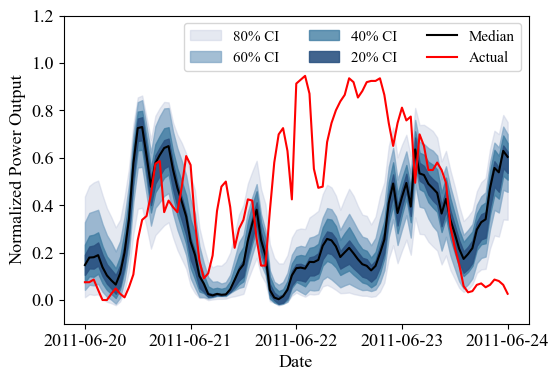

In [50]:
plt.rcParams["font.size"] = 13
result=local_preds[1]
actual=actual_y_lst[1]
start=334
end=334+24*4+1

plot_prob_result(result,actual,start,end)

y0
y1
y2
y3
y4
y5
y6
y7
y8
[0, 24, 48, 72, 96]


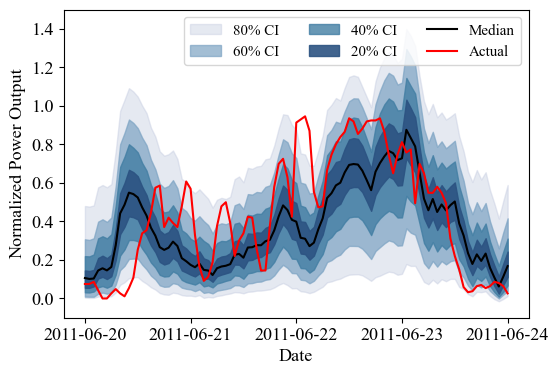

In [52]:
plt.rcParams["font.size"] = 13
result=local_fine_tune_ewc_preds[1]
actual=actual_y_lst[1]
start=334
end=334+24*4+1

plot_prob_result(result,actual,start,end)

y0
y1
y2
y3
y4
y5
y6
y7
y8
[0, 24, 48, 72, 96]


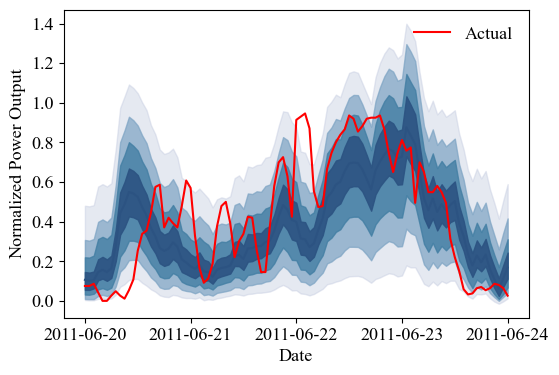

In [105]:
plt.rcParams["font.size"] = 13
result=local_fine_tune_ewc_preds[1]
actual=actual_y_lst[1]
start=334
end=334+24*4+1

plot_prob_result(result,actual,start,end)